# Homework 11

Consider the following problem and solve it by using Gauss-Siedel method:

$$
\left\{
\begin{array}{ll}
\Delta u(x, y) = 0, & x,  y \in (0, 1)\\[6pt]
u(0,y) = 0, & y \in [0, 1]\\[6pt]
u(1,y) = \sin{4\pi y}, & y \in [0, 1]\\[6pt]
u(x,0) = 0, & x \in [0, 1]\\[6pt]
u(x,1) = \sin{\pi x}, & x \in [0, 1]
\end{array}
\right.
$$

For that purpose use the following scheme: 
    
$$
u_{i, j} = \frac{u_{i-1, j} + u_{i+1, j} + u_{i, j-1} + u_{i, j+1}}{4} + \frac{\Delta x^2}{4} \cdot f_{i, j}
$$

where $\Delta x = \Delta y = \frac{a}{N} = \frac{b}{M}$ with a stopping condition $|u_{i, j}^{(n+1)} - u_{i, j}^{(n)}| < \epsilon$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
a = 1.0
b = 1.0

n = 50
m = 50

x = a * np.arange(n + 1)/n
y = b * np.arange(m + 1)/m

dx = a/n
dy = b/n

In [3]:
def top(x):
    return np.sin(np.pi*x)

def down(x):
    return 0

def left(y):
    return 0

def right(y):
    return np.sin(4*np.pi*y)

In [4]:
u = np.zeros((n + 1, m + 1))

In [5]:
epsilon = 0.0005

Fill the boundary:

In [6]:
u[0,:] = left(y)
u[n,:] = right(y)
u[:,0] = down(x)
u[:,m] = top(x)

Define a function that will calculate next $u^{n+1}$:

In [7]:
def find_u(u, n, m):
    for i in range(1, n):
        for j in range(1, m):
            u[i, j] = 0.25*(u[i - 1, j] + u[i + 1, j] + u[i, j - 1] + u[i, j + 1])
    return u

In [8]:
old_u = np.ones((n + 1, m + 1))

Perform iterations up to the stoping conditions:

In [9]:
while np.any(abs(u - old_u)) > epsilon:
    old_u = u.copy()    
    u = find_u(u, n, m)

Plot the resulting graph:

In [10]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

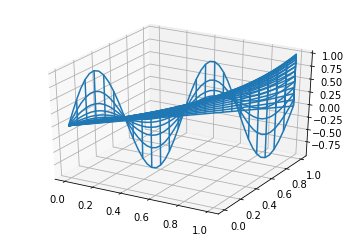

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(x, y, u)
plt.show()

Compare the results with the actual analytical solution:

In [12]:
def sol(x, y):
    return ((1/np.sinh(4*np.pi))*np.sin(4*np.pi*y)*np.sinh(4*np.pi*x) + (1/np.sinh(np.pi))*np.sin(np.pi*x)*np.sinh(np.pi*y))

In [13]:
error = 0
for i in range(n):
    for j in range(m):
        error = error + abs(sol(x[i], y[j]) - u[i, j])

In [14]:
error

0.7107991028630269